In [1]:
# import tensorflow.compat.v1 as tf #使用1.0版本的方法
# tf.disable_v2_behavior() #禁用2.0版本的方法
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD,Adam,RMSprop
import matplotlib.pyplot as plt
import numpy as np
import pickle

Using TensorFlow backend.


In [2]:
# import os

# os.environ['CUDA_VISIBLE_DEVICES'] = '/gpu:0'

In [3]:
# CIFAR-10是一个包含了60000张32×32像素的三通道图像数据集
IMG_CHANNELS =3
IMG_ROWS = 32
IMG_COLS =32

In [4]:
#常量
BATCH_SIZE = 128
NB_EPOCH =20
NB_CLASSES =10
VERBOSE =1
VALIDATION_SPLIT=0.2
OPTIM=RMSprop()

In [5]:
def read_dataset(path="G://cifar-10-batches-py//"):
    x_train = np.empty((50000, 32, 32, 3), dtype='uint8')
    y_train = np.empty((50000,), dtype='uint8')
    x_test = np.empty((10000, 32, 32, 3), dtype='uint8')
    y_test = np.empty((10000,), dtype='uint8')
    for i in range(1, 6):
        path_num = path + "data_batch_" + str(i)
        f = open(path_num, 'rb')
        datadict = pickle.load(f, encoding='bytes')
        x_train[(i - 1) * 10000:i * 10000, :, :, :] = datadict[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
        y_train[(i - 1) * 10000:i * 10000] = datadict[b'labels']
    f = open(path + "test_batch", 'rb')
    datadict = pickle.load(f, encoding='bytes')
    x_test[0:10000, :, :, :] = datadict[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
    y_test[0:10000] = datadict[b'labels']
    return (x_train, y_train), (x_test, y_test)

In [6]:
(X_train, y_train) , (X_test , y_test)  = read_dataset()  # 加载数据集
print('X_train.shape:' , X_train.shape)
print(X_train.shape[0] , 'train smaple')  
print(X_test.shape[0] , 'test smaple')  

X_train.shape: (50000, 32, 32, 3)
50000 train smaple
10000 test smaple


In [7]:
#分类转换
Y_train =np_utils.to_categorical(y_train, NB_CLASSES) 
Y_test =np_utils.to_categorical(y_test, NB_CLASSES)

In [8]:
#看成f1oat类型并归一化
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
#网络
model = Sequential()
model.add(Conv2D(32,(3,3),padding = 'same',input_shape=(IMG_ROWS,IMG_COLS,IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [10]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)              

In [11]:
#训练
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])
history = model.fit(X_train,Y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,validation_split=VALIDATION_SPLIT,verbose = VERBOSE)
score = model.evaluate(X_test,Y_test,batch_size = BATCH_SIZE,verbose = VERBOSE)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 7s 177us/step - loss: 1.7604 - accuracy: 0.3773 - val_loss: 1.4303 - val_accuracy: 0.5010
Epoch 2/20
40000/40000 [==============================] - 4s 96us/step - loss: 1.3919 - accuracy: 0.5068 - val_loss: 1.3093 - val_accuracy: 0.5427
Epoch 3/20
40000/40000 [==============================] - 4s 94us/step - loss: 1.2577 - accuracy: 0.5559 - val_loss: 1.2675 - val_accuracy: 0.5467
Epoch 4/20
40000/40000 [==============================] - 4s 94us/step - loss: 1.1672 - accuracy: 0.5891 - val_loss: 1.2381 - val_accuracy: 0.5670
Epoch 5/20
40000/40000 [==============================] - 4s 95us/step - loss: 1.0884 - accuracy: 0.6169 - val_loss: 1.1942 - val_accuracy: 0.5934
Epoch 6/20
40000/40000 [==============================] - 4s 95us/step - loss: 1.0367 - accuracy: 0.6393 - val_loss: 1.1158 - val_accuracy: 0.6186
Epoch 7/20
40000/40000 [==============================] - 4s 94us/s

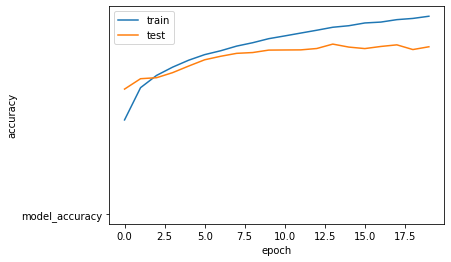

In [12]:
#汇总准确率历史数据
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

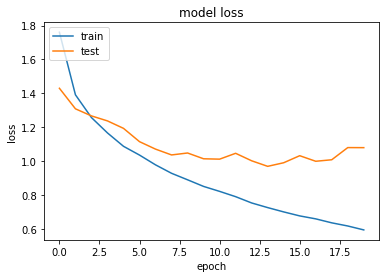

In [13]:
#汇总损失函数历史数据
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [14]:
#保存模型
model_json = model.to_json()
open('cifar10_architecture.json','w').write(model_json)
model.save_weights('cifar10_weights.h5'overwrite=True)

SyntaxError: invalid syntax (<ipython-input-14-19e25e0b95ee>, line 4)